In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Form Analyse:

Target: churn

Row and Column: (3333, 11)

type of variable: QT:10

Missing data: not a missing data

Bottom Analyse:

Churn:
Indicates whether the customer has left the company or not.

1 / Yes = the customer has churned

0 / No = the customer has stayed

AccountWeeks:
Number of weeks since the customer’s account was opened (customer tenure).

ContractRenewal:
Indicates whether the customer has renewed their contract.

Yes / 1 = contract renewed

No / 0 = not renewed

DataPlan:
Indicates whether the customer has a data plan.

Yes / 1 = active data plan

No / 0 = no data plan

DataUsage:
Amount of data consumed by the customer (usually in GB or MB per month).

CustServCalls:
Number of calls made by the customer to customer service (often an indicator of dissatisfaction).

DayMins:
Total number of minutes of daytime calls.

DayCalls:
Total number of daytime calls made.

MonthlyCharge:
Amount charged to the customer each month (subscription + usage).

OverageFee:
Additional fees charged when the customer exceeds their plan limits.

RoamMins:
Number of minutes of calls made while roaming.

In [2]:
dfo = pd.read_csv("/home/kevin/Documents/telecom_churn.csv")
pd.set_option('display.max_columns', None)

In [3]:
df = dfo.copy()
df.head(100)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
95,0,104,1,0,0.3,1,278.4,106,58.0,4.05,9.8
96,0,73,1,0,0.0,0,160.1,110,46.0,10.67,13.0
97,0,99,1,0,0.0,4,198.2,87,52.0,10.37,8.7
98,1,120,1,0,0.0,1,212.1,131,54.0,10.47,5.3


In [4]:
df.shape

(3333, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

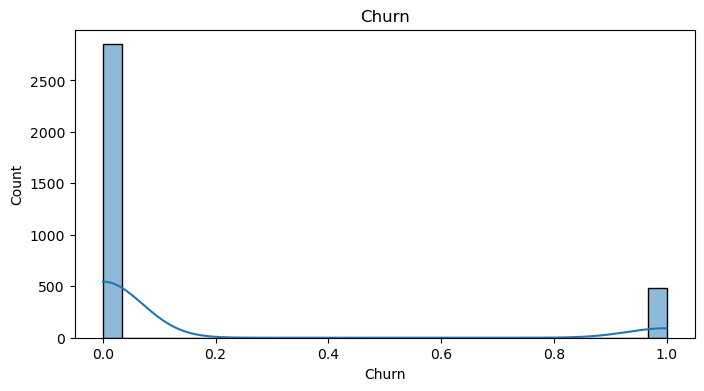

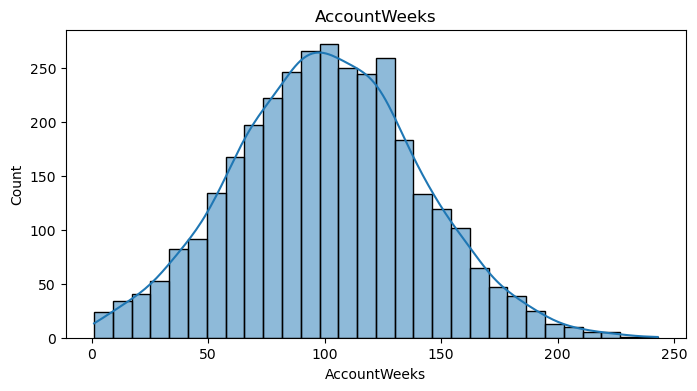

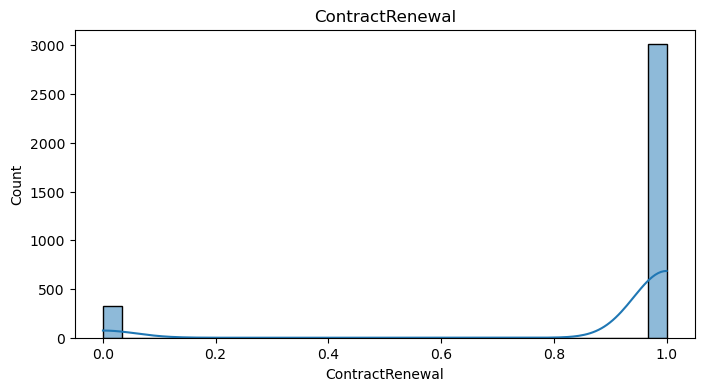

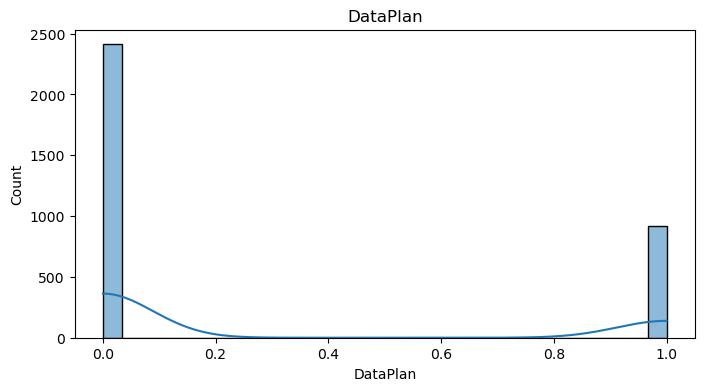

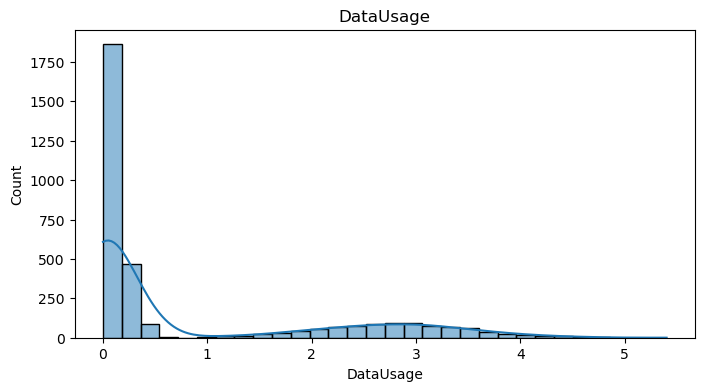

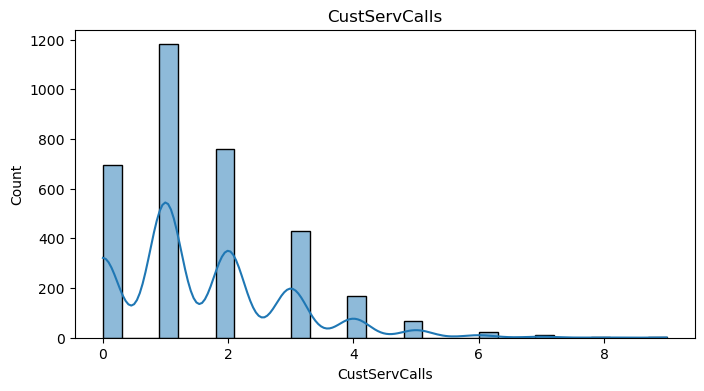

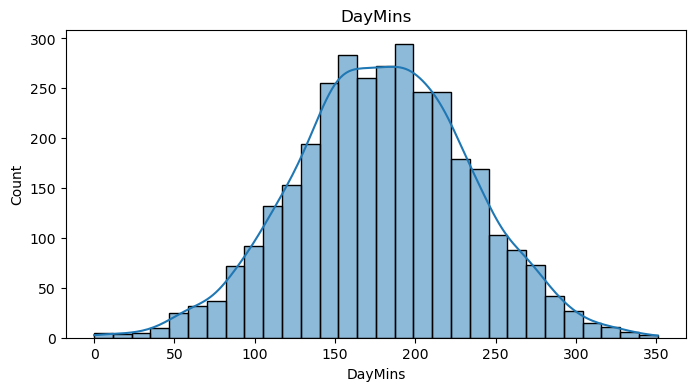

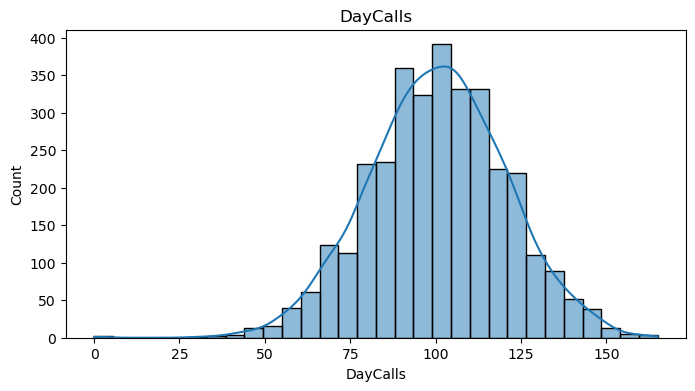

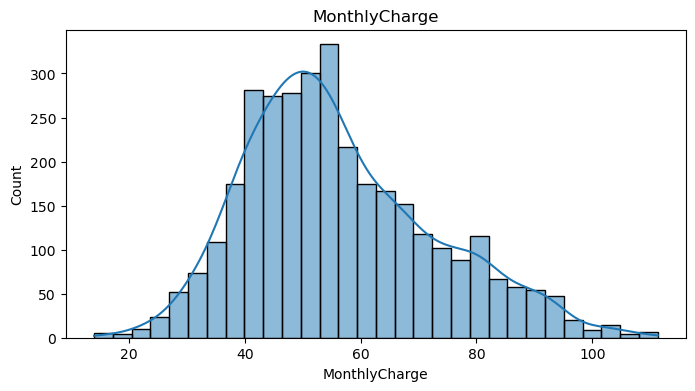

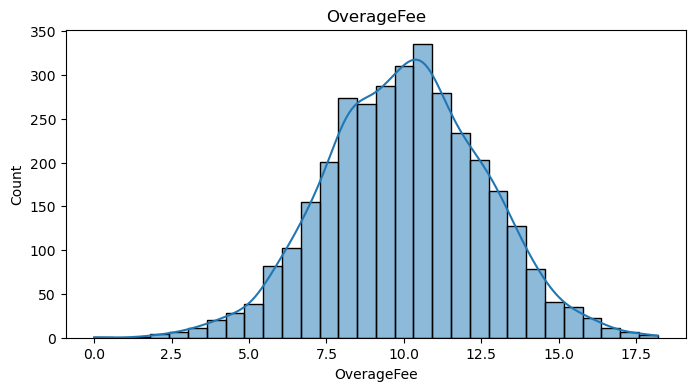

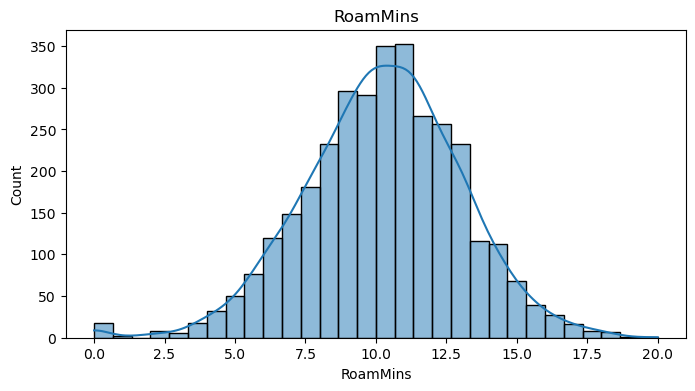

In [8]:
for col in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.show()

<Axes: >

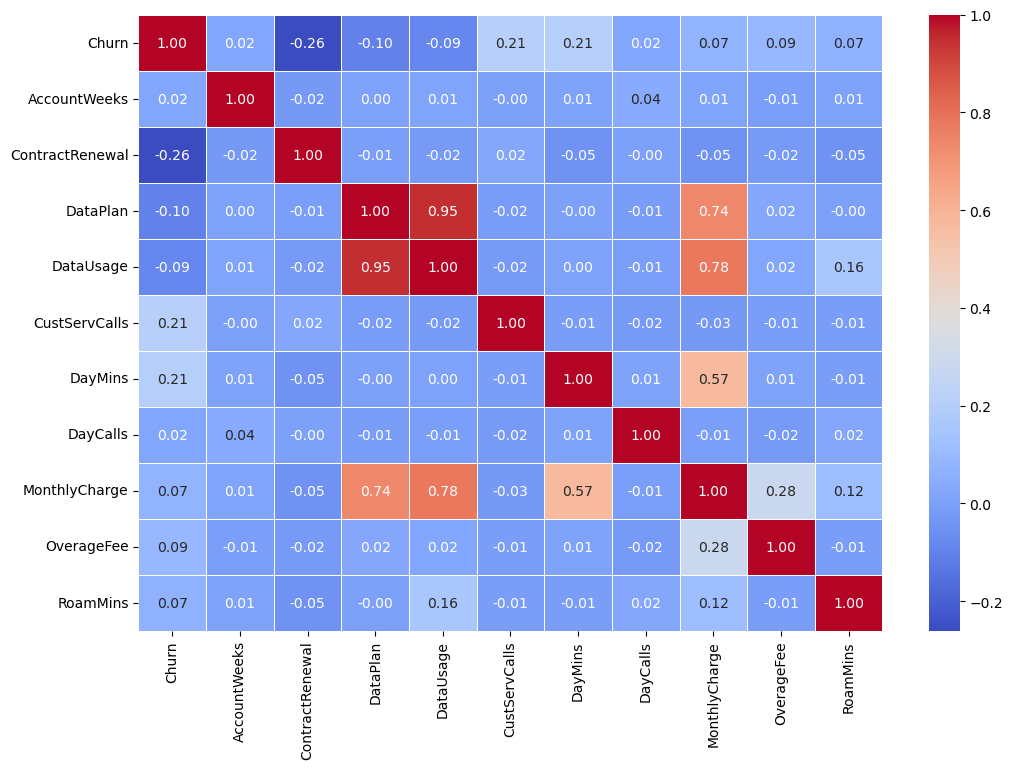

In [9]:
dfc = df.corr()
plt.figure(figsize=(12, 8))

# 3. Creation of the heatmap
sns.heatmap(dfc, 
            annot=True,        
            fmt=".2f",         
            cmap='coolwarm', 
            linewidths=0.5)

Feature selection we see 3 feature for begin:
- ContractRenewal
- DataPlan
- CustServCalls
- DayMins

In [10]:
# taux de churn par type de renouvellement
churn_rate = (
    df.groupby("ContractRenewal")["Churn"]
      .mean()
      .reset_index()
)

churn_rate["Churn"] = churn_rate["Churn"] * 100
churn_rate.columns = ["ContractRenewal", "ChurnRate_%"]
churn_rate

,ContractRenewal,ChurnRate_%
0,0,42.414861
1,1,11.495017


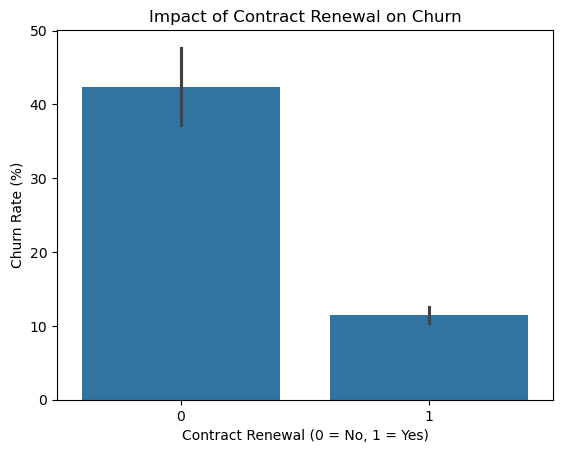

In [11]:
sns.barplot(
    data=df,
    x="ContractRenewal",
    y="Churn",
    estimator=lambda x: x.mean() * 100
)

plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Renewal (0 = No, 1 = Yes)")
plt.title("Impact of Contract Renewal on Churn")
plt.show()

42% of customers churn if they don’t renew their contracts. This is a big problem for telecom services.
Perhaps, at the end of their contracts, they are not satisfied with the service and see an opportunity to leave.

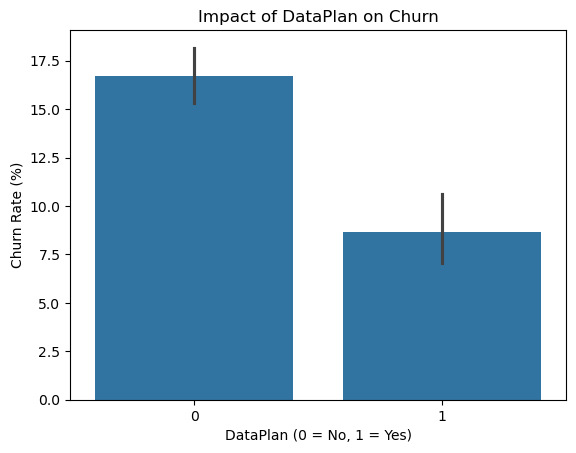

In [12]:
sns.barplot(
    data=df,
    x="DataPlan",
    y="Churn",
    estimator=lambda x: x.mean() * 100
)

plt.ylabel("Churn Rate (%)")
plt.xlabel("DataPlan (0 = No, 1 = Yes)")
plt.title("Impact of DataPlan on Churn")
plt.show()

i think it's like the same problem with dataplan due to the bad experience

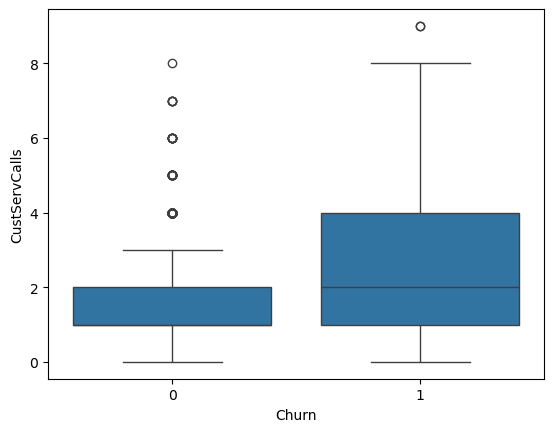

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='CustServCalls', data=df)
plt.show()


From this boxplot, we can see a clear difference: customers who churned contacted customer service more often due to bad experiences.

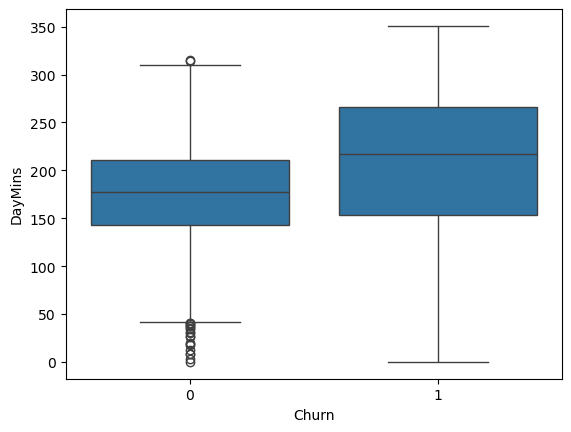

In [16]:
sns.boxplot(x='Churn', y='DayMins', data=df)
plt.show()


From the boxplot with DayMins, we can see a diffarence also but not like the CustServCalls.
This means that customers who churned have higher charges. 

In [42]:
df.groupby('Churn').mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000


Over 54% of customers churn
Over 30 min The customer who churns spends more time using the service.
Customers who churn renew their contracts much less frequently

In [17]:
from scipy.stats import chi2_contingency

# Exemple avec DataPlan
contingency_table = pd.crosstab(df['CustServCalls'], df['Churn'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(np.float64(342.67460696087505), np.float64(2.243376519451563e-68))

after Chi2 with CustServCalls and Churn 
p value < 0.05
They are dependent

In [55]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop(columns='Churn')
y = df['Churn']

mi = mutual_info_classif(
    X,
    y,
    discrete_features='auto',
    random_state=42
)

mi_scores = (
    pd.Series(mi, index=X.columns)
      .sort_values(ascending=False)
)

mi_scores


MonthlyCharge      0.077149
DayMins            0.053470
CustServCalls      0.030491
ContractRenewal    0.020251
DataPlan           0.009166
DataUsage          0.006890
RoamMins           0.006507
DayCalls           0.001123
AccountWeeks       0.000000
OverageFee         0.000000
dtype: float64

the Features Selected: 
    'CustServCalls',
    'MonthlyCharge',
    'DayMins',
    'ContractRenewal',
    'DataPlan' 

In [56]:
features = [
    'CustServCalls',
    'MonthlyCharge',
    'DayMins',
    'ContractRenewal',
    'DataPlan'
]

X = df[features]
y = df['Churn']


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # important because of unbalanced dataset
)


In [58]:
numerical_features = [
    'CustServCalls',
    'MonthlyCharge',
    'DayMins'
]

binary_features = [
    'ContractRenewal',
    'DataPlan'
]

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform on data TRAIN
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(
    X_train[numerical_features]
)

# Fit and transform on data TEST
X_test_scaled[numerical_features] = scaler.transform(
    X_test[numerical_features]
)


In [60]:
X_train_scaled.describe()


,CustServCalls,MonthlyCharge,DayMins,ContractRenewal,DataPlan
count,2.666000e+03,2.666000e+03,2.666000e+03,2666.000000,2666.000000
mean,-6.663004e-17,5.783487e-16,-1.322606e-16,0.904351,0.274569
std,1.000188e+00,1.000188e+00,1.000188e+00,0.294164,0.446380
min,-1.200212e+00,-2.580927e+00,-3.307137e+00,0.000000,0.000000
25%,-4.314073e-01,-6.874828e-01,-6.676787e-01,1.000000,0.000000
50%,-4.314073e-01,-1.683127e-01,-7.468909e-03,1.000000,0.000000
75%,3.373975e-01,6.241851e-01,6.716040e-01,1.000000,1.000000
max,5.719031e+00,3.362044e+00,3.148656e+00,1.000000,1.000000


In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [62]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
# Prdiction (class)
y_pred = log_reg.predict(X_test_scaled)

# Probability
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

print("ROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[555  15]
 [ 79  18]]

Classification Report:
               precision    recall  f1-score   support

           0      0.875     0.974     0.922       570
           1      0.545     0.186     0.277        97

    accuracy                          0.859       667
   macro avg      0.710     0.580     0.599       667
weighted avg      0.827     0.859     0.828       667

ROC AUC: 0.8042322300596852


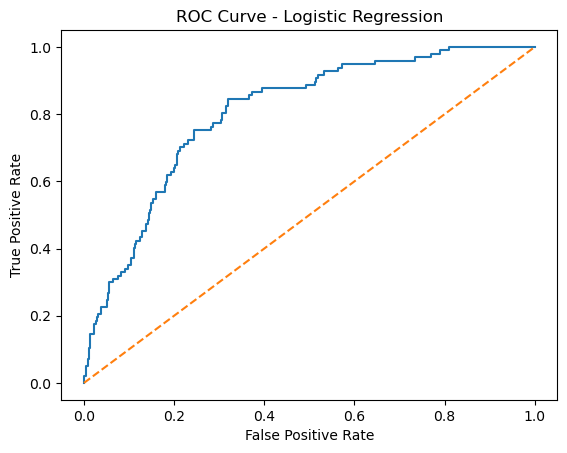

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()


In [64]:
coef = pd.Series(log_reg.coef_[0], index=X_train_scaled.columns).sort_values(key=abs, ascending=False)
coef


DataPlan          -2.426778
ContractRenewal   -1.916452
MonthlyCharge      0.918739
CustServCalls      0.713512
DayMins            0.123103
dtype: float64

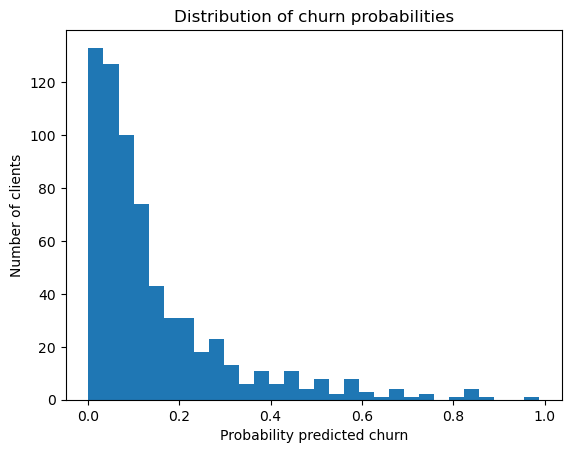

In [65]:
plt.hist(y_proba, bins=30)
plt.xlabel("Probability predicted churn")
plt.ylabel("Number of clients")
plt.title("Distribution of churn probabilities")
plt.show()


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.6, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

pd.DataFrame(results)


,threshold,precision,recall,f1
0,0.10,0.272727,0.865979,0.414815
1,0.15,0.341232,0.742268,0.467532
2,0.20,0.348101,0.567010,0.431373
3,0.25,0.367521,0.443299,0.401869
4,0.30,0.379310,0.340206,0.358696
5,0.35,0.422535,0.309278,0.357143
6,0.40,0.456140,0.268041,0.337662
7,0.45,0.468085,0.226804,0.305556
8,0.50,0.545455,0.185567,0.276923
9,0.55,0.538462,0.144330,0.227642


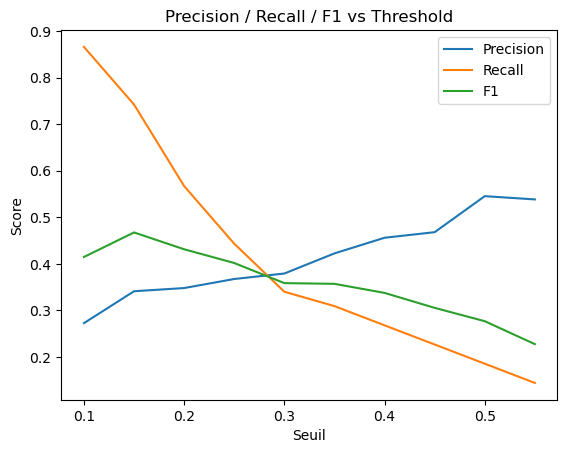

In [67]:
df_results = pd.DataFrame(results)

plt.plot(df_results['threshold'], df_results['precision'], label='Precision')
plt.plot(df_results['threshold'], df_results['recall'], label='Recall')
plt.plot(df_results['threshold'], df_results['f1'], label='F1')
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.title("Precision / Recall / F1 vs Threshold")
plt.show()


In [68]:
chosen_threshold = 0.15

y_pred_new = (y_proba >= chosen_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


[[431 139]
 [ 25  72]]
              precision    recall  f1-score   support

           0      0.945     0.756     0.840       570
           1      0.341     0.742     0.468        97

    accuracy                          0.754       667
   macro avg      0.643     0.749     0.654       667
weighted avg      0.857     0.754     0.786       667

ROC AUC: 0.8042322300596852


we can do better
change the parameter let's add class_weight="balanced"

In [69]:
log_reg2 = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg2.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [70]:
# Prédictions (classe)
y_pred2 = log_reg2.predict(X_test_scaled)

# Probabilités (utile pour ROC/AUC + ajuster un seuil)
y_proba2 = log_reg2.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2, digits=3))

print("ROC AUC:", roc_auc_score(y_test, y_proba2))

Confusion Matrix:
 [[436 134]
 [ 25  72]]

Classification Report:
               precision    recall  f1-score   support

           0      0.946     0.765     0.846       570
           1      0.350     0.742     0.475        97

    accuracy                          0.762       667
   macro avg      0.648     0.754     0.661       667
weighted avg      0.859     0.762     0.792       667

ROC AUC: 0.8037619822752757


In [71]:
chosen_threshold = 0.4

y_pred_new = (y_proba2 >= chosen_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba2))

[[363 207]
 [ 16  81]]
              precision    recall  f1-score   support

           0      0.958     0.637     0.765       570
           1      0.281     0.835     0.421        97

    accuracy                          0.666       667
   macro avg      0.620     0.736     0.593       667
weighted avg      0.859     0.666     0.715       667

ROC AUC: 0.8037619822752757


threshold = 0.4 is the best for the model RL
let's use RandomForest 

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=20,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [73]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[487  83]
 [ 21  76]]

Classification Report:
               precision    recall  f1-score   support

           0      0.959     0.854     0.904       570
           1      0.478     0.784     0.594        97

    accuracy                          0.844       667
   macro avg      0.718     0.819     0.749       667
weighted avg      0.889     0.844     0.858       667

ROC AUC: 0.8451618737565564


In [74]:
chosen_threshold = 0.4

y_pred_new = (y_proba_rf >= chosen_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

[[474  96]
 [ 19  78]]
              precision    recall  f1-score   support

           0      0.961     0.832     0.892       570
           1      0.448     0.804     0.576        97

    accuracy                          0.828       667
   macro avg      0.705     0.818     0.734       667
weighted avg      0.887     0.828     0.846       667

ROC AUC: 0.8451618737565564


In [75]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances

DayMins            0.275795
CustServCalls      0.264123
MonthlyCharge      0.223936
ContractRenewal    0.166320
DataPlan           0.069825
dtype: float64

In [76]:
import shap

explainer = shap.TreeExplainer(rf)
sv = explainer(X_test)


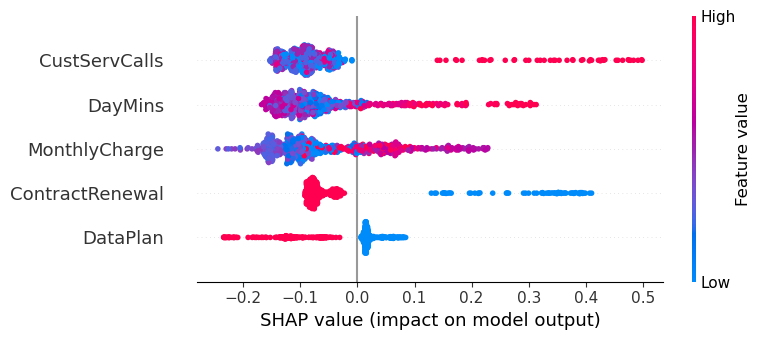

In [77]:
vals = sv.values
if vals.ndim == 3:
    sv_class1 = shap.Explanation(
        values=vals[:, :, 1],
        base_values=sv.base_values[:, 1] if np.array(sv.base_values).ndim == 2 else sv.base_values,
        data=sv.data,
        feature_names=sv.feature_names
    )
    shap.summary_plot(sv_class1, X_test)
else:
    shap.summary_plot(sv, X_test)

[[TN  FP]

 [FN  TP]]


Random Forest:


[[474  96]

 [ 19  78]]


              precision    recall  f1-score   support

           0      0.961     0.832     0.892       570
           1      0.448     0.804     0.576        97

            accuracy                           0.828       667
            macro avg      0.705     0.818     0.734       667
            weighted avg   0.887     0.828     0.846       667

ROC AUC: 0.8451618737565564

Regression Logitic:


[[363 207]

 [ 16  81]]


              precision    recall  f1-score   support

           0      0.958     0.637     0.765       570
           1      0.281     0.835     0.421        97

            accuracy                              0.666       667
            macro avg         0.620     0.736     0.593       667
            weighted avg      0.859     0.666     0.715       667

ROC AUC: 0.8037619822752757

Based on these results, RF is the best model because it represents a cost-effective commercial solution with 96 FP compared to 207 FP for RL.

However, RL has 16 FN and RF has 19 FN.

In [78]:
import joblib

joblib.dump(
    {
        "model": rf,
        "features": X_train.columns.tolist()
    },
    "churn_model_rf.pkl"
)



['churn_model_rf.pkl']

In [79]:
bundle = joblib.load("churn_model_rf.pkl")

rf_loaded = bundle["model"]
features = bundle["features"]

X_new = df[features]
rf_loaded.predict(X_new)


array([0, 0, 0, ..., 0, 1, 0])